### Quantium Forage Project: 

The scope of part one is to analyze potato chip sales for a Quantium client. They want to gain insights on the sales data they have for the past year. The sales period is from July 2018 to June 2019. 

In [92]:
#loading in initial packages and files. 

import pandas as pd 
import numpy as np 
import datetime as dt 

chips = pd.read_excel("in1.xlsx")
chips_dem = pd.read_csv("QVI_purchase_behaviour.csv")

In [93]:
#exploring the dataset 
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
1,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
2,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
3,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
4,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
264831,2018-07-19,189,189489,190259,35,Woolworths Mild Salsa 300g,1,1.5
264832,2018-11-27,195,195375,195274,76,Woolworths Medium Salsa 300g,1,1.5
264833,2018-07-31,254,254042,254129,35,Woolworths Mild Salsa 300g,1,1.5
264834,2019-01-30,254,254215,254303,76,Woolworths Medium Salsa 300g,1,1.5


In [94]:
#exploring the column types and for missing data 
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [95]:
#exploring chips demographics 
chips_dem

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [96]:
#exploring column types and for missing values 
chips_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [97]:
#exploring columns and counts
chips_dem['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [98]:
#exploring columns and counts
chips_dem['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [99]:
#nothing needs to be changed it seems at this time for the chip demographcs. Moving forward with the transaction dataset. 

chips["PROD_NAME"].unique()

array(['Dorito Corn Chp     Supreme 380g',
       'Smiths Crnkle Chip  Orgnl Big Bag 380g',
       'Smiths Crinkle      Original 330g', 'Cheezels Cheese 330g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Doritos Cheese      Supreme 330g', 'Kettle Original 175g',
       'Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Honey Soy    Chicken 175g',
       'Kettle Sweet Chilli And Sour Cream 175g', 'Kettle Chilli 175g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Kettle Sensations   Siracha Lime 150g',
       'Kettle Tortilla ChpsBtroot&Ricotta 150g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Twisties Cheese     270g', 'Twisties Chicken270g',
       'Kettle Sensations   BBQ&Maple 150g',
       'Tostitos Smoked     Chipotle 175g',
       'Dor

In [100]:
#seperating chips weight. 
chips["WEIGHT"] = chips["PROD_NAME"].str[-4:]

chips["WEIGHT"]

0         380g
1         380g
2         380g
3         380g
4         380g
          ... 
264831    300g
264832    300g
264833    300g
264834    300g
264835    300g
Name: WEIGHT, Length: 264836, dtype: object

In [101]:
#one came across as Salt the proper weight is 135g
chips["WEIGHT"].value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: WEIGHT, dtype: int64

In [102]:
#correcting the data
chips["WEIGHT"] = chips["WEIGHT"].replace({'Salt':'135g', "210G": "210g", "150G": "150g", "175G": "175g"})

In [103]:
#confirming correction 
chips["WEIGHT"].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [104]:
chips["PROD_NAME"] = chips["PROD_NAME"].str.strip()

In [105]:
#salsa was in the dataset since this is not a chip this will be dropped from the dataset

index_drop = chips[chips["PROD_NAME"] == "Old El Paso Salsa"].index

chips = chips.drop(index_drop)

In [106]:
#confirming salsa was dropped. 
chips[chips["PROD_NAME"] == "Old El Paso Salsa"].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
WEIGHT            0
dtype: int64

In [107]:
#creating brand column 
chips["BRAND"] = chips["PROD_NAME"].str.split().str.get(0)

chips["BRAND"].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [108]:
#so far we have cleaned the Prod Name, and created 2 columns Brand and Weight
#lets check the date column next

chips["DATE"].unique()

array(['2018-08-19T00:00:00.000000000', '2019-05-20T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2019-05-14T00:00:00.000000000',
       '2019-05-19T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-08-16T00:00:00.000000000', '2019-05-16T00:00:00.000000000',
       '2018-08-14T00:00:00.000000000', '2018-08-18T00:00:00.000000000',
       '2019-05-17T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2019-05-15T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-02-28T00:00:00.000000000', '2018-07-19T00:00:00.000000000',
       '2018-11-03T00:00:00.000000000', '2018-12-12T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-09-14T00:00:00.000000000',
       '2019-05-28T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-02-23T00:00:00.000000000', '2019-02-17T00:00:00.000000000',
       '2019-05-29T00:00:00.000000000', '2019-06-13T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-10-22

In [109]:
#the view is not the best but looks like we have one missing date 12/25/2018
chip_sales_dates = chips.sort_values(by='DATE')
chip_sales_dates["DATE"].unique()

array(['2018-07-01T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-03T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-07-05T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-07-07T00:00:00.000000000', '2018-07-08T00:00:00.000000000',
       '2018-07-09T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-12T00:00:00.000000000',
       '2018-07-13T00:00:00.000000000', '2018-07-14T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000', '2018-07-16T00:00:00.000000000',
       '2018-07-17T00:00:00.000000000', '2018-07-18T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-07-20T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-07-22T00:00:00.000000000',
       '2018-07-23T00:00:00.000000000', '2018-07-24T00:00:00.000000000',
       '2018-07-25T00:00:00.000000000', '2018-07-26T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-07-28

In [110]:
#adding the missing data and creating a datetime column without the timestamp. 
chips['SHORT_DATE'] = pd.to_datetime(chips['DATE']).dt.strftime('%Y-%m-%d')

chips_christmas = {"SHORT_DATE": "2018-12-25"}

chips = chips.append(chips_christmas, ignore_index=True)

chips["SHORT_DATE"].value_counts(dropna=False)

C:\Users\marko\AppData\Local\Temp\ipykernel_118956\2201774909.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chips = chips.append(chips_christmas, ignore_index=True)


2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
2018-12-25      1
Name: SHORT_DATE, Length: 365, dtype: int64

In [111]:
# rrd brand is Red brand merging the two. 
chips["BRAND"] = chips["BRAND"].replace({"RRD": "Red"})

chips["BRAND"].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Red           17779
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [112]:
# rrd brand is Red brand merging the two. 
chips["BRAND"] = chips["BRAND"].replace({"Dorito": "Doritos", "Smith":"Smiths", "Infzns":"Infuzions"})

chips["BRAND"].value_counts()

Kettle        41288
Smiths        31823
Doritos       28147
Pringles      25102
Red           17779
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [113]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
0,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19
1,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20
2,2018-08-15,94.0,94148.0,93390.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15
3,2019-05-14,190.0,190113.0,190914.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-14
4,2018-08-15,49.0,49303.0,45789.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...
264832,2018-11-27,195.0,195375.0,195274.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2018-11-27
264833,2018-07-31,254.0,254042.0,254129.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2018-07-31
264834,2019-01-30,254.0,254215.0,254303.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2019-01-30
264835,2019-03-30,265.0,265111.0,263428.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-03-30


In [114]:
#looking at the print out above looks like we might have an outlier. 

chips[chips["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
0,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2018-08-19
1,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380g,Doritos,2019-05-20


In [115]:
#as we can see above this member only made 2 purchases in a year and both were in bulk. this might be for a business/school
#dropping the outlier from the dataset

chips = chips.drop([0,1])

chips = chips.reset_index(drop=True)

In [116]:
#confirming dropped and index reset
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE
0,2018-08-15,94.0,94148.0,93390.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15
1,2019-05-14,190.0,190113.0,190914.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-14
2,2018-08-15,49.0,49303.0,45789.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15
3,2019-05-19,194.0,194308.0,194516.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-19
4,2019-05-20,118.0,118021.0,120799.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-20
...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-11-27,195.0,195375.0,195274.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2018-11-27
264831,2018-07-31,254.0,254042.0,254129.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2018-07-31
264832,2019-01-30,254.0,254215.0,254303.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2019-01-30
264833,2019-03-30,265.0,265111.0,263428.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-03-30


In [117]:
#merging both datasets.

chips_merged = pd.merge(chips, chips_dem, on='LYLTY_CARD_NBR', how='left')

chips_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,SHORT_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-08-15,94.0,94148.0,93390.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15,MIDAGE SINGLES/COUPLES,Mainstream
1,2019-05-14,190.0,190113.0,190914.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-14,OLDER FAMILIES,Mainstream
2,2018-08-15,49.0,49303.0,45789.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2018-08-15,OLDER FAMILIES,Premium
3,2019-05-19,194.0,194308.0,194516.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-19,OLDER SINGLES/COUPLES,Premium
4,2019-05-20,118.0,118021.0,120799.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5,380g,Smiths,2019-05-20,RETIREES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-11-27,195.0,195375.0,195274.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2018-11-27,YOUNG SINGLES/COUPLES,Premium
264831,2018-07-31,254.0,254042.0,254129.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2018-07-31,YOUNG SINGLES/COUPLES,Premium
264832,2019-01-30,254.0,254215.0,254303.0,76.0,Woolworths Medium Salsa 300g,1.0,1.5,300g,Woolworths,2019-01-30,YOUNG SINGLES/COUPLES,Premium
264833,2019-03-30,265.0,265111.0,263428.0,35.0,Woolworths Mild Salsa 300g,1.0,1.5,300g,Woolworths,2019-03-30,YOUNG SINGLES/COUPLES,Premium


In [118]:
#reorganizing the columns

chips_final = chips_merged[["SHORT_DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID","LIFESTAGE","PREMIUM_CUSTOMER","PROD_NBR","BRAND", "PROD_NAME","WEIGHT", "PROD_QTY", "TOT_SALES"]]

chips_final

,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,BRAND,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,2018-08-15,94.0,94148.0,93390.0,MIDAGE SINGLES/COUPLES,Mainstream,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5
1,2019-05-14,190.0,190113.0,190914.0,OLDER FAMILIES,Mainstream,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5
2,2018-08-15,49.0,49303.0,45789.0,OLDER FAMILIES,Premium,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5
3,2019-05-19,194.0,194308.0,194516.0,OLDER SINGLES/COUPLES,Premium,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5
4,2019-05-20,118.0,118021.0,120799.0,RETIREES,Mainstream,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2018-11-27,195.0,195375.0,195274.0,YOUNG SINGLES/COUPLES,Premium,76.0,Woolworths,Woolworths Medium Salsa 300g,300g,1.0,1.5
264831,2018-07-31,254.0,254042.0,254129.0,YOUNG SINGLES/COUPLES,Premium,35.0,Woolworths,Woolworths Mild Salsa 300g,300g,1.0,1.5
264832,2019-01-30,254.0,254215.0,254303.0,YOUNG SINGLES/COUPLES,Premium,76.0,Woolworths,Woolworths Medium Salsa 300g,300g,1.0,1.5
264833,2019-03-30,265.0,265111.0,263428.0,YOUNG SINGLES/COUPLES,Premium,35.0,Woolworths,Woolworths Mild Salsa 300g,300g,1.0,1.5


In [119]:
#saving to csv

chips_final.to_csv('chips_final.csv')

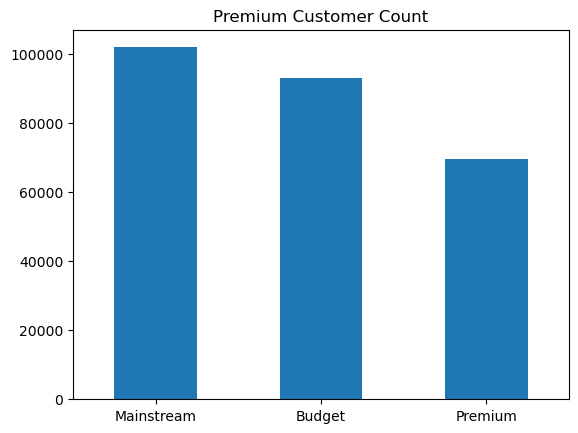

In [120]:
#now that the data set is ready we can explore the set and gather some insight
import matplotlib.pyplot as plt 

pc_vc = chips_final["PREMIUM_CUSTOMER"].value_counts()

pc_vc.plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Premium Customer Count")
plt.show()

In [121]:
#creating a dataset of just unique member numbers and counting the unique members by Premium customer type. 
unique_members =  chips_final.drop_duplicates(subset= "LYLTY_CARD_NBR")
unique_members["PREMIUM_CUSTOMER"].value_counts()

Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64

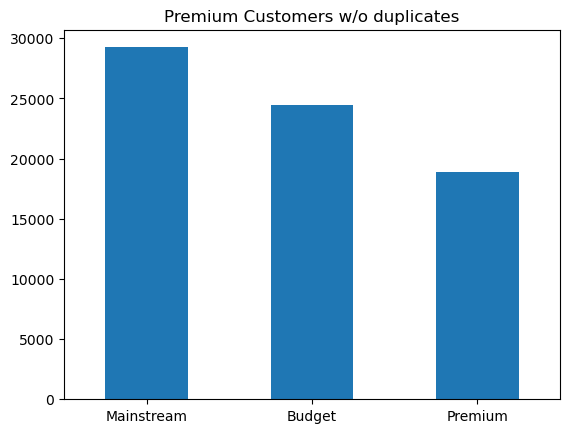

In [122]:
um_pc = unique_members["PREMIUM_CUSTOMER"].value_counts()

um_pc.plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Premium Customers w/o duplicates")
plt.show()

In [123]:
#viewing the lifestage customer segment 
unique_members["LIFESTAGE"].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

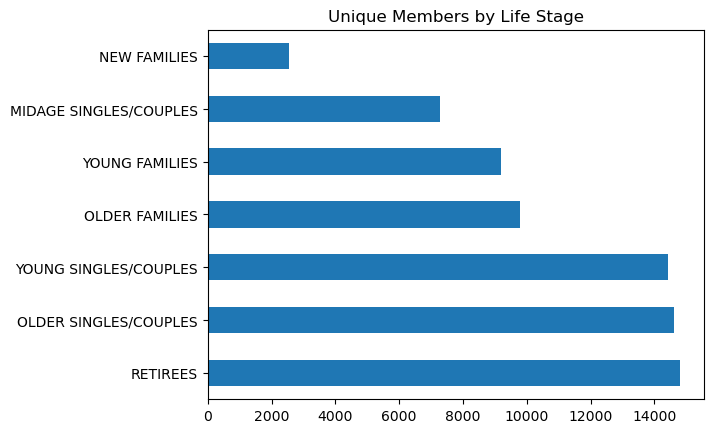

In [124]:
um_ls = unique_members["LIFESTAGE"].value_counts()

um_ls.plot(kind='barh')
plt.xticks(rotation=360)
plt.title("Unique Members by Life Stage")
plt.show()

In [125]:
#grouping by brand
chips_br = chips_final.groupby("BRAND")

In [126]:
#totaling the sales for each brand
chip_sales_brand = chips_br["TOT_SALES"].sum()

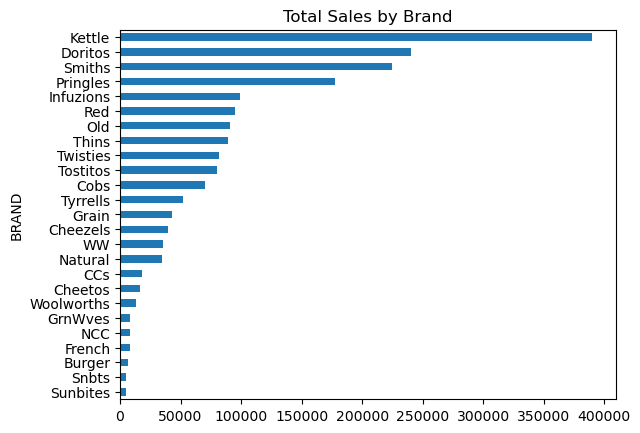

In [127]:
chip_sales_brand.sort_values().plot(kind='barh')
plt.title("Total Sales by Brand")
plt.show()

In [128]:
chips_mbr = chips_final.groupby("LYLTY_CARD_NBR")

chip_sales_mbr = chips_mbr["TOT_SALES"].sum()


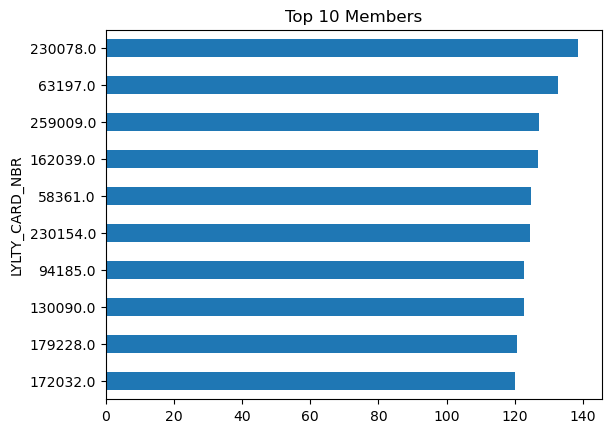

In [129]:
chip_sorted = chip_sales_mbr.sort_values()

chip_sorted.tail(10).plot(kind='barh')
plt.title("Top 10 Members")
plt.show()

In [130]:
top_ten = [230078,63197,259009,162039,58361,230154,94185,130090,179228,172032]

top_ten_members = chips_final[chips_final['LYLTY_CARD_NBR'].isin(top_ten)]

top_ten_grouped = top_ten_members.groupby("LYLTY_CARD_NBR")

top_ten_grouped['LIFESTAGE'].value_counts()

LYLTY_CARD_NBR  LIFESTAGE            
58361.0         YOUNG FAMILIES           14
63197.0         OLDER FAMILIES           15
94185.0         YOUNG FAMILIES           16
130090.0        YOUNG FAMILIES           14
162039.0        OLDER FAMILIES           18
172032.0        YOUNG SINGLES/COUPLES    18
179228.0        YOUNG FAMILIES           16
230078.0        OLDER FAMILIES           17
230154.0        OLDER FAMILIES           14
259009.0        OLDER SINGLES/COUPLES    15
Name: LIFESTAGE, dtype: int64

In [131]:
top_ten_grouped["PREMIUM_CUSTOMER"].value_counts()

LYLTY_CARD_NBR  PREMIUM_CUSTOMER
58361.0         Budget              14
63197.0         Budget              15
94185.0         Premium             16
130090.0        Budget              14
162039.0        Mainstream          18
172032.0        Mainstream          18
179228.0        Budget              16
230078.0        Budget              17
230154.0        Budget              14
259009.0        Mainstream          15
Name: PREMIUM_CUSTOMER, dtype: int64

In [132]:
chip_sorted.describe()

count    72636.000000
mean        26.613731
std         20.271119
min          1.500000
25%          9.100000
50%         21.700000
75%         40.000000
max        138.600000
Name: TOT_SALES, dtype: float64

In [133]:
#grouping by lifestage and extracting total sales
chips_ls = chips_final.groupby("LIFESTAGE")

chips_ls_sales = chips_ls["TOT_SALES"].sum()

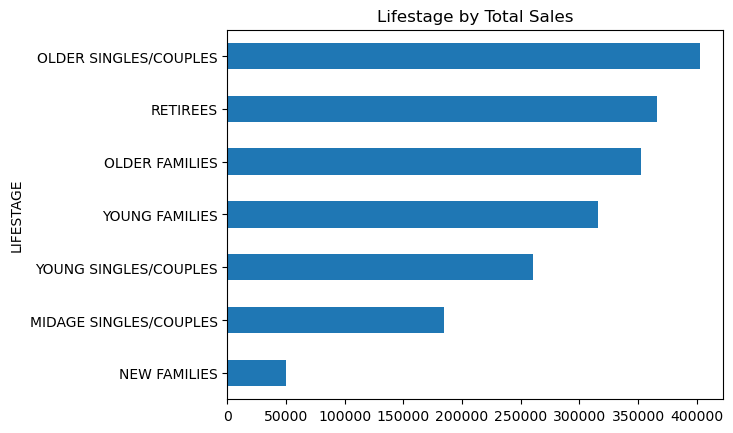

In [134]:
chips_ls_sales.sort_values().plot(kind='barh')
plt.title("Lifestage by Total Sales")
plt.show()

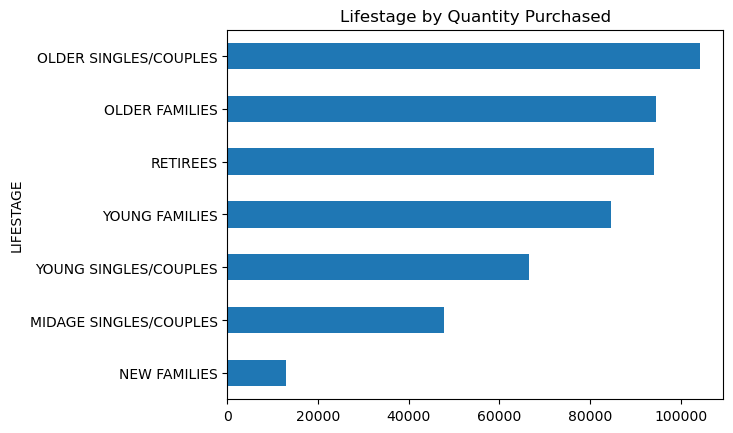

In [135]:
chips_ls_qty = chips_ls["PROD_QTY"].sum()

chips_ls_qty.sort_values().plot(kind='barh')
plt.title("Lifestage by Quantity Purchased")
plt.show()

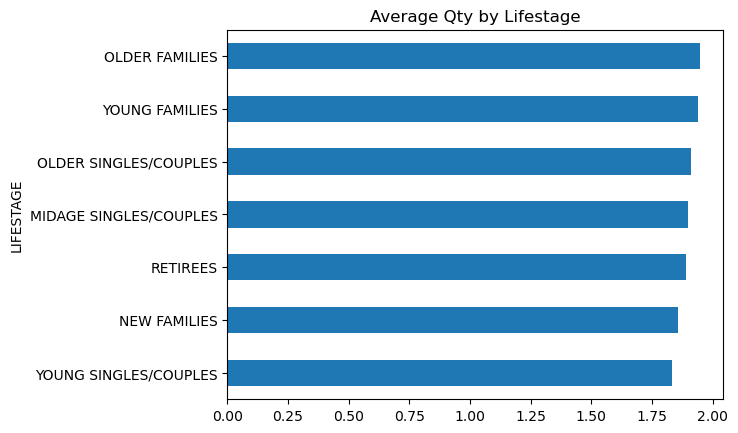

In [136]:
#lets look at the average by lifestage segement

chips_ls_avg_qty = chips_ls["PROD_QTY"].mean()
chips_ls_avg_sales = chips_ls["TOT_SALES"].mean()

chips_ls_avg_qty.sort_values().plot(kind="barh")
plt.title("Average Qty by Lifestage")
plt.show()

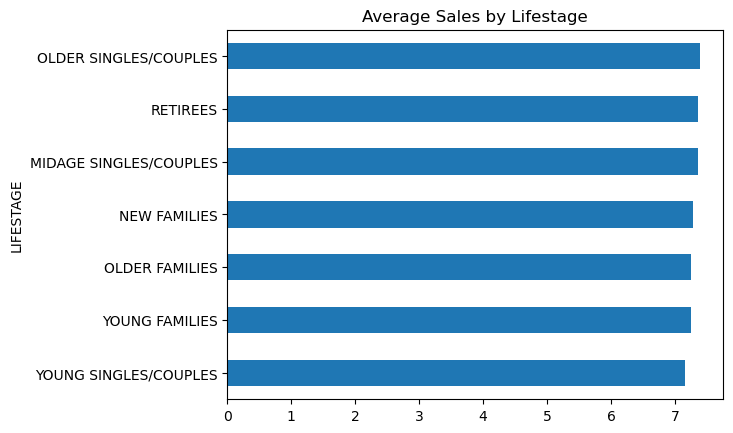

In [137]:
chips_ls_avg_sales.sort_values().plot(kind="barh")
plt.title("Average Sales by Lifestage")
plt.show()

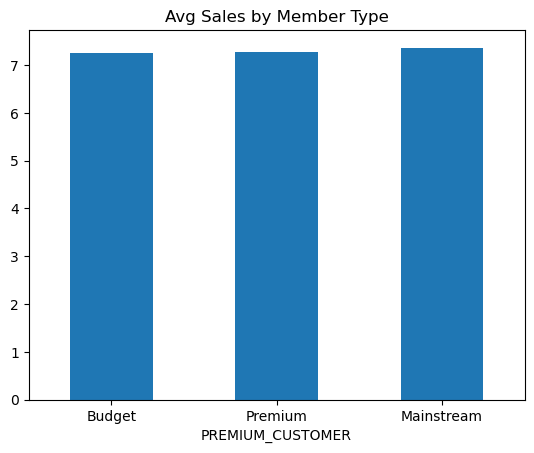

In [138]:
#lets do the same for membership type. 

chips_pt = chips_final.groupby('PREMIUM_CUSTOMER')

chips_pt_avg_qty = chips_pt["PROD_QTY"].mean()
chips_pt_avg_sales = chips_pt["TOT_SALES"].mean()

chips_pt_avg_sales.sort_values().plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Avg Sales by Member Type")
plt.show()

In [139]:
#hard to see the difference with just a graph lets check the raw numbers quickly 

chips_pt_avg_sales.round(3)

PREMIUM_CUSTOMER
Budget        7.259
Mainstream    7.361
Premium       7.263
Name: TOT_SALES, dtype: float64

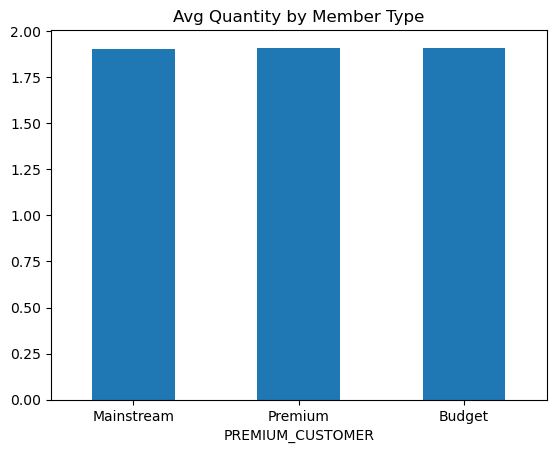

In [140]:
chips_pt_avg_qty.sort_values().plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Avg Quantity by Member Type")
plt.show()

In [141]:
chips_pt_avg_qty.round(3)

PREMIUM_CUSTOMER
Budget        1.910
Mainstream    1.902
Premium       1.906
Name: PROD_QTY, dtype: float64

In [142]:
#viewing chip sales by premium customer type and brand. 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

chips_pt["BRAND"].value_counts()

PREMIUM_CUSTOMER  BRAND     
Budget            Kettle        14154
                  Smiths        11548
                  Doritos        9818
                  Pringles       8620
                  Red            6480
                  Thins          4931
                  Infuzions      4922
                  WW             3881
                  Cobs           3274
                  Tostitos       3236
                  Twisties       3229
                  Old            3203
                  Natural        2246
                  Tyrrells       2195
                  Grain          2114
                  CCs            1679
                  Cheezels       1626
                  Woolworths     1605
                  Cheetos        1051
                  Snbts           610
                  Burger          579
                  GrnWves         542
                  French          539
                  NCC             539
                  Sunbites        536
Mainstream        Ket

In [143]:
#creating pivot table and looking for difference in purchase behavior between brands. 
customer_type_counts = chips_final['PREMIUM_CUSTOMER'].value_counts()

pivot_table = chips_final.pivot_table(index='PREMIUM_CUSTOMER', columns='BRAND', aggfunc='size', fill_value=0)

percentage_difference = (pivot_table / customer_type_counts[:, np.newaxis]) * 100

percentage_difference

C:\Users\marko\AppData\Local\Temp\ipykernel_118956\325339480.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentage_difference = (pivot_table / customer_type_counts[:, np.newaxis]) * 100


BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,GrnWves,Infuzions,Kettle,NCC,Natural,Old,Pringles,Red,Smiths,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
PREMIUM_CUSTOMER,,,,,,,,,,,,,,,,,,,,,,,,,
Budget,0.567714,1.646272,1.030513,1.594305,3.210182,9.626623,0.528494,2.072793,0.531435,4.826058,13.878103,0.528494,2.202220,3.140566,8.451975,6.353689,11.322901,0.598110,0.525552,4.834883,3.172922,3.166059,2.152214,3.805350,1.573715
Mainstream,0.588254,1.750808,1.192610,1.862447,4.174673,12.014127,0.544243,2.700817,0.559271,5.957684,17.629378,0.531361,2.320813,3.998626,10.630441,6.936677,12.711874,0.583960,0.534581,5.835310,4.011507,4.063033,2.772738,3.849416,1.725045
Premium,0.627072,1.780769,1.097734,1.782204,3.630415,10.238345,0.533800,2.356182,0.581153,5.350916,15.369714,0.552454,2.356182,3.438132,9.440514,6.940837,12.100905,0.605548,0.571109,5.320782,3.584497,3.501270,2.387751,4.093903,1.757810


There is not much of a difference from lifestage and member type when it comes to average price and quantity purhcased.
Lets see if some statistical tests can provide us with a deeper insight. Lets perform a t test on the young families and young singles and see if there is any statistical difference. The null hypothesis will be there is no significant difference and our alternative hyopthesis is there is a difference. I will use the standard 5% p value threshold. 

In [144]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

import scipy.stats as stats

chips_ls.describe()

STORE_NBR                                           \
                           count        mean        std  min   25%    50%   
LIFESTAGE                                                                   
MIDAGE SINGLES/COUPLES   25110.0  135.664755  76.613509  1.0  71.0  133.0   
NEW FAMILIES              6919.0  133.769475  77.816076  1.0  67.0  131.0   
OLDER FAMILIES           48594.0  134.165000  75.176434  1.0  70.0  128.0   
OLDER SINGLES/COUPLES    54479.0  134.024542  76.438581  1.0  69.0  130.0   
RETIREES                 49763.0  136.159295  77.859231  1.0  70.0  133.0   
YOUNG FAMILIES           43592.0  136.019476  75.474556  1.0  71.0  133.0   
YOUNG SINGLES/COUPLES    36377.0  135.122138  79.344684  1.0  65.0  133.0   

                                     LYLTY_CARD_NBR                 ...  \
                          75%    max          count           mean  ...   
LIFESTAGE                                                           ...   
MIDAGE SINGLES/COUPLES  203.0  272.0        25110.0  136208.697810  ...   
NEW FAMILIES            201.0  272.0         6919.0  133970.287469  ...   
OLDER FAMILIES          199.0  272.0        48594.0  134510.856567  ...   
OLDER SINGLES/COUPLES   201.0  272.0        54479.0  134670.120762  ...   
RETIREES                207.0  272.0        49763.0  136621.915982  ...   
YOUNG FAMILIES          201.0  272.0        43592.0  136382.402551  ...   
YOUNG SINGLES/COUPLES   205.0  272.0        36377.0  135629.000247  ...   

                       PROD_QTY      TOT_SALES                                \
                            75%  max     count      mean       std  min  25%   
LIFESTAGE                                                                      
MIDAGE SINGLES/COUPLES      2.0  5.0   25110.0  7.357678  2.532071  1.5  5.6   
NEW FAMILIES                2.0  5.0    6919.0  7.289124  2.557880  1.5  5.4   
OLDER FAMILIES              2.0  5.0   48594.0  7.253307  2.488841  1.5  5.4   
OLDER SINGLES/COUPLES       2.0  5.0   54479.0  7.386823  2.511223  1.5  5.8   
RETIREES                    2.0  5.0   49763.0  7.364325  2.529464  1.5  5.6   
YOUNG FAMILIES              2.0  5.0   43592.0  7.252709  2.486029  1.5  5.4   
YOUNG SINGLES/COUPLES       2.0  5.0   36377.0  7.158515  2.628117  1.5  5.4   

                                        
                        50%  75%   max  
LIFESTAGE                               
MIDAGE SINGLES/COUPLES  7.4  9.2  29.5  
NEW FAMILIES            7.4  9.2  27.0  
OLDER FAMILIES          7.4  8.8  29.5  
OLDER SINGLES/COUPLES   7.4  9.2  29.5  
RETIREES                7.4  9.2  29.5  
YOUNG FAMILIES          7.4  8.8  29.5  
YOUNG SINGLES/COUPLES   7.4  8.8  27.0  

[7 rows x 48 columns]

In [145]:
#grouping by lifestage 
chips_youngfam = chips_final[chips_final["LIFESTAGE"] == "YOUNG FAMILIES"]
chips_young = chips_final[chips_final["LIFESTAGE"] == "YOUNG SINGLES/COUPLES"]

In [146]:
t_statistic, p_value = stats.ttest_ind(chips_youngfam["TOT_SALES"], chips_young["TOT_SALES"]) 

print("T STAT", t_statistic)
print("P VALUE", p_value)

T STAT 5.1982858323764685
P VALUE 2.0162783045849555e-07


Based on the P value above we can reject the Alternative hypothesis. There is no real difference in spending habits between young families and young singles. 

Lets see if the same goes for Customer type. 

We will again use the same null and alternative hypothesis as previous with the same significance value. 


In [147]:
chips_prem = chips_final[chips_final["PREMIUM_CUSTOMER"] == "Premium"]
chips_bud = chips_final[chips_final["PREMIUM_CUSTOMER"] == "Budget"]

t_statistic, p_value = stats.ttest_ind(chips_prem["TOT_SALES"], chips_bud["TOT_SALES"]) 

print("T STAT", t_statistic)
print("P VALUE", p_value)

T STAT 0.3361170557426489
P VALUE 0.7367830303364282


Again we can reject the alternative hyopthesis and conclude there is no significant difference between customer types. 

In [148]:
#now exploring the weights of bags purchased 
chips_final["WEIGHT"].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [149]:
chips_final["WEIGHT"] = chips_final["WEIGHT"].astype(str)

C:\Users\marko\AppData\Local\Temp\ipykernel_118956\3988065714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_final["WEIGHT"] = chips_final["WEIGHT"].astype(str)


In [150]:
#creating custom category of chip bag sizes 

weight_category_map = {
    ' 70g': 'Extra Small',
    ' 90g': 'Extra Small',
    '110g': 'Small',
    '125g': 'Small',
    '134g': 'Small',
    '135g': 'Small',
    '150g': 'Small',
    '160g': 'Small',
    '165g': 'Small',
    '170g': 'Small',
    '175g': 'Small',
    '180g': 'Small',
    '190g': 'Small',
    '200g': 'Medium',
    '210g': 'Medium',
    '220g': 'Medium',
    '250g': 'Medium',
    '270g': 'Medium',
    '300g': 'Large',
    '330g': 'Large',
    '380g': 'Large',
    'nan': np.nan
    
}

# Create a new column 'weight_category' by mapping values
chips_final['BAG_SIZE'] = chips_final['WEIGHT'].map(weight_category_map)

In [151]:
chips_final['BAG_SIZE'].value_counts()

Small          204434
Large           34122
Medium          21763
Extra Small      4515
Name: BAG_SIZE, dtype: int64

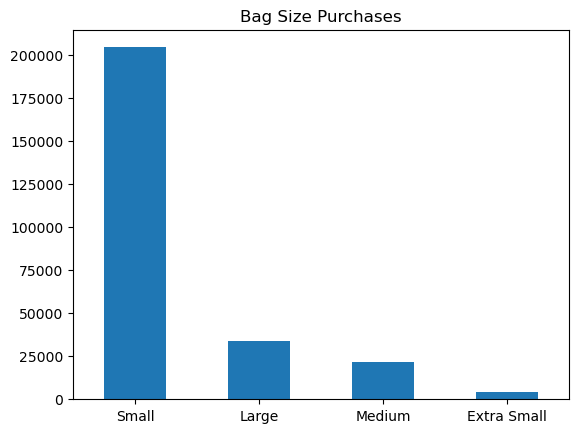

In [152]:
chips_bs = chips_final['BAG_SIZE'].value_counts()

chips_bs.plot(kind='bar')
plt.xticks(rotation=360)
plt.title("Bag Size Purchases")
plt.show()

In [153]:
#saving to csv with new bag size column 

chips_final.to_csv('chips_final.csv')

Preliminary notes: 
* Largest customer type is the Mainstream group 
* Largest Membership group is the older population. 
* Top 10 members spent over 120 dollars on chips within a year. 
* Top 4 brands sold are: Doritos, Smiths, Pringles, and Kettle
* Older individuals purchased the most chips which includes single individuals and families. New families purchased the least on chips. 
* There doesn’t appear to be any statistical difference with purchase prices with customers in either life stage or membership type. 
* The most purchased sized chips were the small bags and then large bags. The common medium sized bags and extra small were sold the least. 
